In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
#import pygraphviz as pgv
from collections import defaultdict
### Python program to convert infix expression to postfix

In [3]:
# Class to convert the expression
class Conversion:
     
    # Constructor to initialize the class variables
    def __init__(self, capacity, expression):
        self.top = -1
        self.capacity = capacity
        # This array is used a stack 
        self.array = []
        # Precedence setting
        self.output = []
        self.precedence = { '(': 1,'|': 2, '.': 3, '?': 4,'*': 4,'+': 4,'^': 5}
        self.expression = expression
        self.postfix = ""
        self.graph = nx.DiGraph()
        self.values={}
        self.edge_dict = defaultdict(set)
        self.root = -1
        self.last_leaf = {0:0}
        self.l = set()
        self.p = set()
        self.d = set()
        self.f = set()
     
    # check if the stack is empty
    def isEmpty(self):
        return True if self.top == -1 else False
     
    # Return the value of the top of the stack
    def peek(self):
        return self.array[-1]
     
    # Pop the element from the stack
    def pop(self):
        if not self.isEmpty():
            self.top -= 1
            return self.array.pop()
        else:
            return "$"
     
    # Push the element to the stack
    def push(self, op):
        self.top += 1
        self.array.append(op) 
 
    # A utility function to check is the given character
    # is operand 
    def isOperand(self, ch):
        return ch.isalpha() or ch=='_'
 
    # Check if the precedence of operator is strictly
    # less than top of stack or not
    def notGreater(self, i):
        try:
            a = self.precedence[i]
            b = self.precedence[self.peek()]
            return True if a  <= b else False
        except KeyError: 
            return False
             
    # The main function that converts given infix expression
    # to postfix expression
    def infixToPostfix(self):
         
        # Iterate over the expression for conversion
        for i in self.expression:
            # If the character is an operand, 
            # add it to output
            if self.isOperand(i):
                self.output.append(i)
             
            # If the character is an '(', push it to stack
            elif i  == '(':
                self.push(i)
 
            # If the scanned character is an ')', pop and 
            # output from the stack until and '(' is found
            elif i == ')':
                while( (not self.isEmpty()) and self.peek() != '('):
                    a = self.pop()
                    self.output.append(a)
                if (not self.isEmpty() and self.peek() != '('):
                    return -1
                else:
                    self.pop()
 
            # An operator is encountered
            else:
                while(not self.isEmpty() and self.notGreater(i)):
                    self.output.append(self.pop())
                self.push(i)
  
        # pop all the operator from the stack
        while not self.isEmpty():
            self.output.append(self.pop())
 
        self.postfix = "".join(self.output)
    
    def constructGraph(self):
        #print (self.postfix[0])
        del self.array[:]
        self.top = -1
        i = 0
        node_id = 0
        self.graph.add_node(node_id,value=self.postfix[i])
        self.push((node_id,self.postfix[i]))
        #self.powerset.add(self.postfix[i])
        self.values[node_id]=self.graph.nodes()[node_id]['value']
        while (not self.isEmpty() and i != len(self.postfix) - 1):
            for i in range(1, len(self.postfix)):
                #print(self.array)
                if (self.postfix[i].isalpha() or self.postfix[i]=='_'):
                    node_id = node_id +1
                    self.push((node_id,self.postfix[i]))
                    #self.powerset.add(self.postfix[i])
                    self.graph.add_node(node_id,value=self.postfix[i])
                    self.values[node_id]=self.graph.nodes()[node_id]['value']
                elif (len(self.array)==1 and self.postfix[i] in ['+', '*', '?']):
                    left = self.pop()
                    node_id = node_id + 1
                    right = (node_id, self.postfix[i])
                    self.graph.add_node(node_id, value=self.postfix[i])
                    self.values[node_id]=self.graph.nodes()[node_id]['value']
                    node_id = node_id + 1
                    parent = (node_id,'.')
                    self.graph.add_node(node_id, value='.')
                    self.values[node_id]=self.graph.nodes()[node_id]['value']
                    self.push(parent)
                    self.graph.add_edges_from([(parent[0], left[0]),(parent[0], right[0])])
                else:
                    right = self.pop()
                    left = self.pop()
                    node_id = node_id + 1
                    parent = (node_id,self.postfix[i])
                    self.graph.add_node(node_id, value=parent[1])
                    self.values[node_id]=self.graph.nodes()[node_id]['value']
                    self.push(parent)
                    self.graph.add_edges_from([(parent[0], left[0]),(parent[0], right[0])])
        A = nx.nx_agraph.to_agraph(self.graph)
        pos = nx.nx_agraph.graphviz_layout(self.graph, prog='dot')
        A.layout('dot')
        nx.draw(G=self.graph, pos=pos, labels=self.values, with_labels=True, arrows=True, node_color='y', node_size=1000)
        plt.show()
        #print(self.values)
    def set_edge_dict(self):
        self.edge_dict = {k:set() for k in list(self.graph.nodes())}
        for k,v in self.graph.edges:
            self.edge_dict[k].add(v)
        self.edge_dict = dict(self.edge_dict)
    def set_root(self):
        lst = [x[1] for x in self.graph.edges]
        #print(set(lst))
        self.root = list(set(obj.graph.nodes).symmetric_difference(set(lst)))[0]
    def dfs_rec(self, start, path=[]):
        path = path + [start]
        for node in self.edge_dict[start]:
            if not node in path:
                path = self.dfs_rec(node, path)
        node = start
        #print("Exiting node ", node)
        if (self.values[node] in ['?', '*']):
            self.l[node] = True
        elif (self.values[node] in ['.', '+'] and len(self.edge_dict[node])!=0):
            lista = list(self.edge_dict[node])
            left = self.l[lista[0]]
            right = self.l[lista[1]]
            self.l[node] = left and right
        return path
    
    def set_p(self, start, path=[]):
        path = path + [start]
        #last_leaf=0
        for node in self.edge_dict[start]:
            if not node in path:
                if len(self.edge_dict[node]) != 0:
                    lista = list(self.edge_dict[node])
                    left = self.l[lista[0]]
                    right = self.l[lista[1]]
                    path = self.set_p(node, path) or    
        node = start
        return path
    
    def set_last_leaf(self):
        for node in (self.graph.nodes()):
            if (len(self.edge_dict[node])==0):
                self.last_leaf[node] = node
            else:
                self.last_leaf[node] = self.last_leaf[node-1]
        print(self.last_leaf)

ab+?c*?d?*


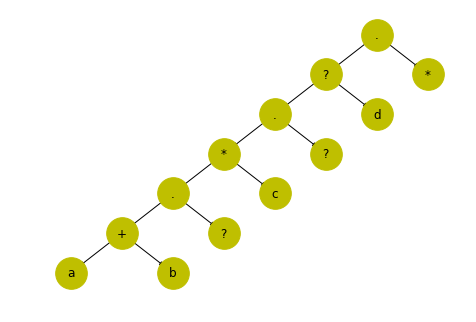

set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
(((a+b?)*c?)d?)*


[(0, False, 'a'),
 (1, False, 'b'),
 (2, False, '+'),
 (3, True, '?'),
 (4, False, '.'),
 (5, False, 'c'),
 (6, True, '*'),
 (7, True, '?'),
 (8, True, '.'),
 (9, False, 'd'),
 (10, True, '?'),
 (11, True, '*'),
 (12, True, '.')]

In [19]:
# Driver program to test above function
#exp = "(((a)+(b)*)*c?)*(d*e+f.g)*(h+i+j.l)k?"
exp = "(((a+b?)*c?)d?)*"
obj = Conversion(len(exp), exp)
obj.infixToPostfix()
print(obj.postfix)
obj.constructGraph()
obj.set_edge_dict()
obj.set_root()
obj.l= {k:False for k in list(obj.graph.nodes())}
#obj.p= {k:set() for k in list(obj.graph.nodes())}
# #print(obj.l)
# print(obj.values)
obj.dfs_rec(obj.root)
# obj.set_p(obj.root)
print(exp)
[(k,obj.l[k], obj.values[k]) for k in list(obj.graph.nodes())]

In [ ]:
#print(nx.is_tree(self.graph))
#T = nx.tree(self.graph)
#pos = nx._layout(self.graph)
#nx.draw_networkx_nodes(G=self.graph, pos=pos, node_size = 500)
#nx.draw_networkx_labels(G=self.graph, pos=pos)
#nx.draw_networkx_edge_labels(G=self.graph, pos=pos)
#nx.draw_networkx_edges(G=self.graph, pos=pos,edgelist=self.graph.edges(), arrows=True)
#nx.write_dot(self.graph, 'test.dot')
#for x in range(len(self.graph.nodes())):
#    self.values[x]=self.graph.nodes()[x]['value']
#     def getL(self, chaine) :
# if chaine == '':
#     self.l.add({chaine: 1})
# elif len(chaine)==1 and chaine[0].isalpha():
#     self.l.add({chaine: None})
# elif chaine.index('.')

abc?d*?.


In [4]:
list(obj.values[0])

['a']